<a href="https://colab.research.google.com/github/TAUforPython/BaseControlTheory/blob/main/%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B4%D0%B8%D1%84%D1%83%D1%80%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# загружаем библиотеки
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [34]:
!pip install sympy

In [35]:
import sympy
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols

Обыкновенное линейное дифференциальное уравнение второго порядка:

\\begin{cases}
 & \frac{\mathrm{d^{2} y} }{\mathrm{d} t^{2}}  +b \frac{\mathrm{d y} }{\mathrm{d} t}  + c y(t) = u(t)
\end{cases}

Введем новые переменные:
\\begin{cases}
 & x_1 = y(t) \\
 & \frac{\mathrm{d} x_1}{\mathrm{d} t} = x_2  
\end{cases}

дифференциальное уравнение в форме Коши (ну, в целом, не совсем в форме Коши, так как не задали начальные условия)
\\begin{cases}
 & \frac{\mathrm{d} x_1}{\mathrm{d} x} = x_2 \\
 & \frac{\mathrm{d} x_2}{\mathrm{d} x} = -bx_2 - c*x_1 + u(t)
\end{cases}

In [36]:
# Определяем переменные
t = sympy.symbols('t')
b = sympy.symbols('b')
y = sympy.Function('y')

# Определяем уравнение
equation = sympy.Eq(y(t).diff(t,t), -b * y(t).diff(t) - c * y(t) + sin(t))

# Решаем уравнение
solution = sympy.dsolve(equation)

print(solution)

Eq(y(t), C1*exp(t*(-0.5*b + 2.23606797749979*sqrt(0.05*b**2 - 1.0))) + C2*exp(-t*(0.5*b + 2.23606797749979*sqrt(0.05*b**2 - 1.0))) - b*cos(t)/(b**2 + 16.0) + 4.0*sin(t)/(b**2 + 16.0))


In [43]:
#записываем дифференциальное уравнения
def ode(y, t, b, c):
        x1, x2 = y
        dydt = [x2, -b * x2 - c * x1 + np.sin(t)]
        return dydt

#задаем параметры системы и начальные условия
b = 0.25
c = 5.0
args=(b, c)

In [38]:
#задаем функцию численного решения дифференциального уравнения
def calcODE(args, y0, dy0, ts, nt):
    y0 = [y0, dy0]
    t = np.linspace(0, ts, nt)
    sol = odeint(ode, y0, t, args)
    return sol

In [39]:
#задаем функцию отрисовки фазового портрета в зависимости от начальных условий
def drawPhasePortrait(args, deltaX, deltaDX, startX, stopX, startDX, stopDX, ts, nt):

    plt.figure(figsize=(10,10))
    for y0 in range(startX, stopX, deltaX):
            for dy0 in range(startDX, stopDX, deltaDX):
                sol = calcODE(args, y0, dy0, ts, nt)
                plt.plot(sol[:, 0], sol[:, 1], 'b')
    plt.xlabel('x = $x_1$')
    plt.ylabel('dx/dt = $x_2$')
    plt.grid()
    plt.show()

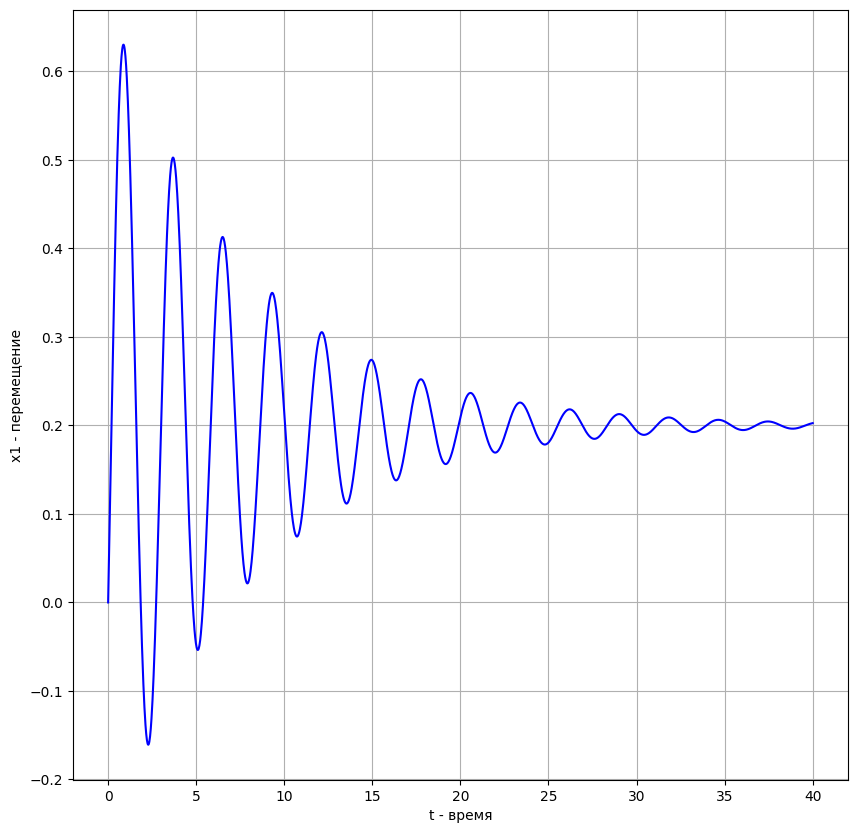

In [42]:
#решаем диффернциальное уравнение, рисуем график


sol = calcODE(args, y0 = 0, dy0 = 1, ts = 40, nt = 2000)
t = np.linspace(0, 40, 2000)
plt.figure(figsize=(10,10))
plt.xlabel('t - время')
plt.ylabel('x1 - перемещение')
plt.plot(t, sol[:, 0], 'b')
plt.grid()
plt.show()